#**Problem: pick a data science problem that you plan to solve**

The problem should be important and interesting, which has a potential impact in some area.
The problem should be solvable using the available data and data mining and machine learning solutions.
As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets/domains for further consideration, find out a problem which you believe to be important in the market and design your solution. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve. Why the problem is important to solve? Why you believe you could make a big difference with data science technology.

Please briefly describe in the following cell:

1. The problem you trying to solve:

2. Why the problem is important to solve?

3. What is your idea to solve the problem?

4. What differences you could make with your data science approach?

1. We are trying to proactively identify people at risk of having a stroke in the future based on risk factors such as heart disease, obesity, hypertension, diabetes, and smokers.

2. In the US 795,000 deaths occur only due to strokes. Strokes are a leading cause of long-term disability. It reduces mobility in aged survivors. Stroke related costs were estimated to be 53 billion dollars between 2017 and 2018. It is important that we bring down these numbers to help people to not only lose their loved ones but also not put them in debt due to the costs that they would have to bear in an event of one of their family members succumbing to or surviving a stroke.

3. With the dataset that was taken from Kaggle, the number of people recorded with strokes is an insignificant percentage of the total records. Due to which we have decided to approach the problem by recreating the dataset where the people with strokes are at a reasonable proportion with the total records. Our approach is to use different algorithms such as SVM, MLP and Logistic Regression with different parameters to help solve the problem.

4. With the help of our prediction tool, we can help with early prediction of strokes in people. It will benefit the medical and healthcare community with a tool that help them provide treatment with better information about what causes the stroke. This would in turn help them provide better medical advice or remedies for patients. On the other hand, for patients it gives them an opportunity to make changes to their lifestyle that would help prolong their life.

#**Data Collection:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df[('stroke')].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [8]:
shuffle = df.sample(frac=1)
stroke = df.loc[df['stroke'] == 1]
nostroke = df.loc[df['stroke']== 0].sample(n=1300)

In [9]:
shuffle.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
16159,63008,Female,48.0,1,0,Yes,Self-employed,Urban,99.53,NaN,NaN,1
22432,59237,Female,49.0,0,0,Yes,Self-employed,Rural,199.84,21.7,never smoked,0
28752,16937,Male,5.0,0,0,No,children,Rural,99.98,20.1,NaN,0
16444,55797,Female,38.0,0,0,No,Private,Rural,159.22,29.7,smokes,0
35452,52296,Male,9.0,0,0,No,children,Urban,109.47,31.7,NaN,0


In [10]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
141,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
257,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
264,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
nostroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8331,54419,Male,26.0,0,0,Yes,Private,Rural,62.46,23.3,NaN,0
22196,28511,Female,67.0,0,0,Yes,Private,Urban,79.26,24.0,formerly smoked,0
22381,23959,Female,37.0,0,0,Yes,Self-employed,Rural,92.49,37.4,never smoked,0
14874,72331,Male,44.0,0,0,Yes,Private,Rural,55.46,24.2,never smoked,0
17424,66549,Female,82.0,0,0,Yes,Self-employed,Rural,198.94,39.8,never smoked,0


In [12]:
newdf = pd.concat([stroke, nostroke])

In [13]:
newdf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
141,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
257,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
264,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#**Data Exploration**:

In [14]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#E8CE9D","figure.facecolor":"#E8CE9D","grid.color":"white"})
sns.set_context("poster",font_scale = .7)

# palette = ["#432C0A","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette = ["#764a23","#f7941d","#6c9a76","#f25a29","#cc4b57"]
palette_cmap = ["#6c9a76","#cc4b57","#764a23","#f25a29","#f7941d"]

# sns.palplot(sns.color_palette(palette))
# sns.palplot(sns.color_palette(palette_cmap))
# plt.show()

Let's have a look on the distribution of stroke patient's age :


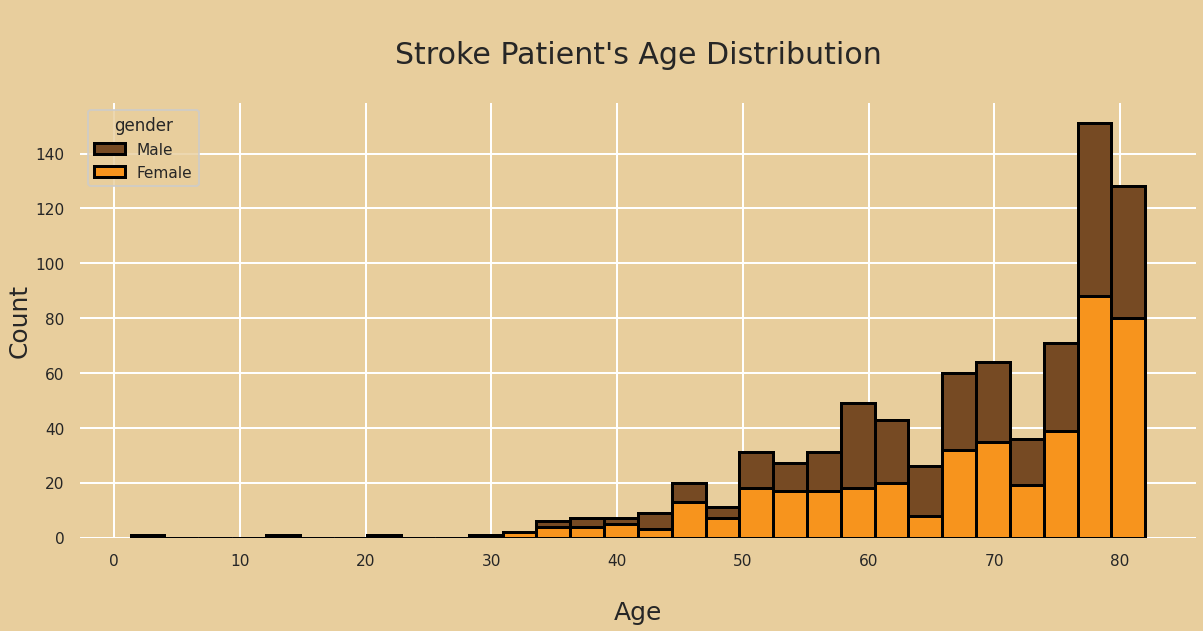

In [15]:
print(f"Let's have a look on the distribution of stroke patient's age :")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=newdf[newdf["stroke"] == 1],x="age",hue="gender",multiple="stack",palette=palette[0:2],bins=30,alpha=1,fill=True,edgecolor="black",linewidth=3)
p.axes.set_title("\nStroke Patient's Age Distribution\n",fontsize=30)
p.set_ylabel("Count",fontsize=25)
p.set_xlabel("\nAge",fontsize=25)
p.set_yscale("linear")
sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the ratio of stroke patient's gender :


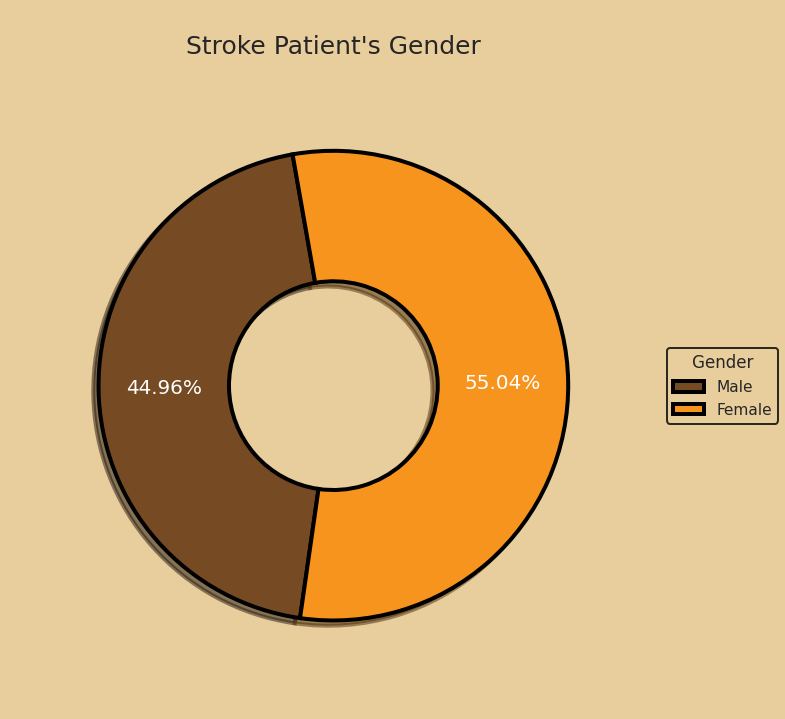

In [16]:
print(f"Let's have a look on the ratio of stroke patient's gender :")
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([df[df["stroke"] == 1]["gender"].value_counts(ascending=True).values[0],
                                    df[df["stroke"] == 1]["gender"].value_counts(ascending=True).values[1]],
                                    explode = (0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = palette[0:2], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = 100)

plt.legend(wedges, labels, title="Gender",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nStroke Patient's Gender",fontsize=25)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


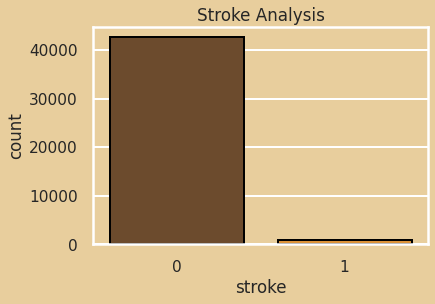

In [18]:
sns.countplot('stroke', data=df, palette= palette [0:2],edgecolor='black')
plt.title('Stroke Analysis')
plt.show()

Based on the above graph, we can see that the number of records where a person has suffered from stroke is insignificant in comparision to the total number of records.
If we create a classification model based on this, the model would not be able to accurately predict cases where a person is expected to get a stroke.
Hence, we have created a reduced dataset, where the number of stroke postive records are at an appropriate percentage of the total number of records.
This is shown below.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


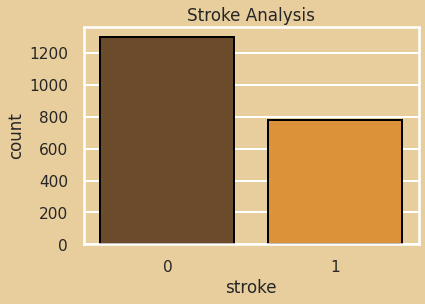

In [19]:
sns.countplot('stroke', data=newdf, palette= palette [0:2],edgecolor='black')
plt.title('Stroke Analysis')
plt.show()

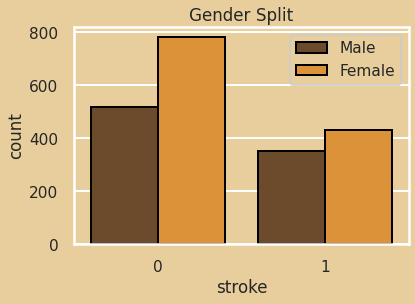

In [20]:
sns.countplot(x='stroke', hue = 'gender', data = newdf, palette= palette [0:2],edgecolor='black')
plt.title('Gender Split')
plt.legend(loc='upper right')
plt.show()

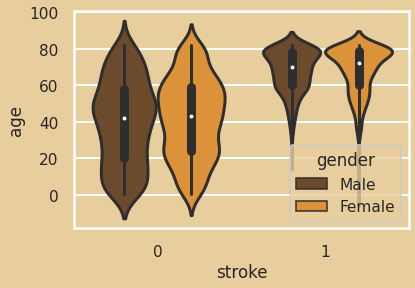

In [21]:
sns.violinplot(x = 'stroke', y = 'age', hue = "gender", data=newdf, palette= palette [0:2],edgecolor='black')

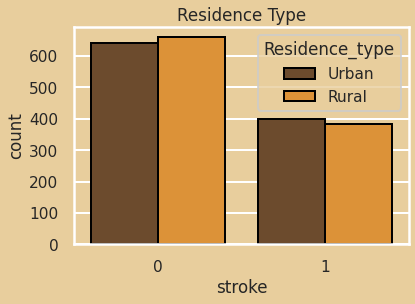

In [22]:
sns.countplot(x='stroke', hue = 'Residence_type', data =newdf, palette= palette [0:2],edgecolor='black')
plt.title('Residence Type')
plt.show()

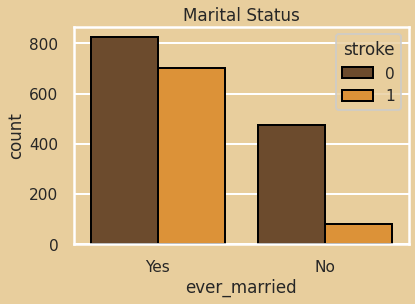

In [23]:
sns.countplot(x='ever_married', hue = 'stroke', data = newdf,palette= palette [0:2],edgecolor='black')
plt.title('Marital Status')
plt.show()

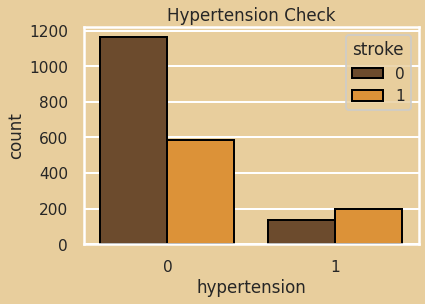

In [25]:
sns.countplot(x='hypertension', hue = 'stroke', data = newdf,palette= palette [0:2],edgecolor='black')
plt.title('Hypertension Check')
plt.show()

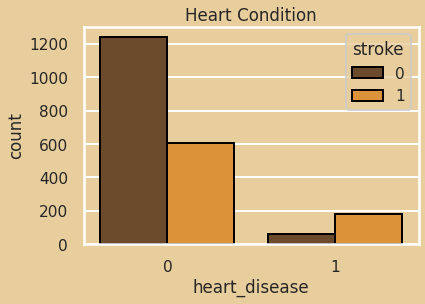

In [26]:
sns.countplot(x='heart_disease', hue = 'stroke', data = newdf,palette= palette [0:2],edgecolor='black')
plt.title('Heart Condition')
plt.show()

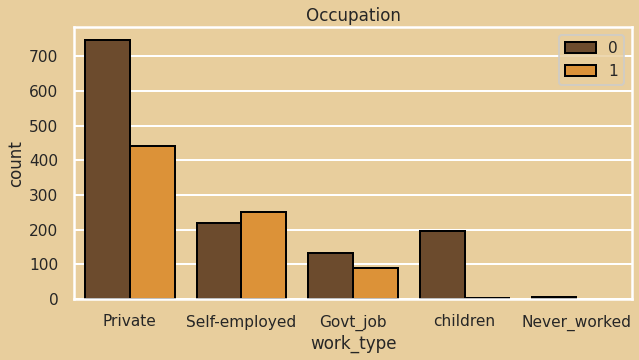

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='work_type', hue = 'stroke', data = newdf,palette= palette [0:2],edgecolor='black')
plt.legend(loc='upper right')
plt.title('Occupation')
plt.show()

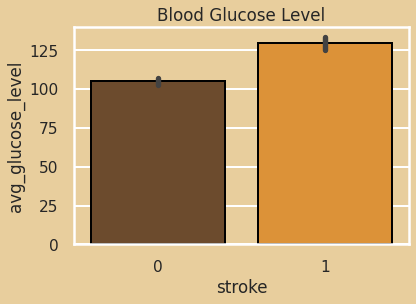

In [29]:
sns.barplot(x='stroke', y = 'avg_glucose_level', data = newdf,palette= palette [0:2],edgecolor='black')
plt.title('Blood Glucose Level')
plt.show()

#**Data Analysis:**

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [31]:
newdf=newdf.drop('id',axis=1)

In [32]:
label=newdf.stroke

In [33]:
newdf=newdf.drop('stroke',axis=1)

In [34]:
newdf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
63,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
81,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
141,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
257,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
264,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [35]:
newdf.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  178
smoking_status       574
dtype: int64

In [36]:
newdf['bmi'].fillna(newdf['bmi'].mean(), inplace= True)

In [37]:
newdf['smoking_status'].fillna(newdf['smoking_status'].mode()[0], inplace=True)

In [38]:
newdf.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [39]:
sex=pd.get_dummies(newdf['gender'],drop_first=True)
sex.head()

,Male
63,1
81,0
141,1
257,0
264,0


In [40]:
newdf.drop(["gender"],axis=1,inplace=True)
newdf['gender']=sex['Male']

In [41]:
newdf.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender
63,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
81,61.0,0,0,Yes,Self-employed,Rural,202.21,29.095433,never smoked,0
141,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
257,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,0
264,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,0


In [42]:
marriage=pd.get_dummies(newdf['ever_married'],drop_first=True)
newdf.drop(['ever_married'],axis=1,inplace=True)
newdf['ever_married']=marriage

In [43]:
newdf.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender,ever_married
63,67.0,0,1,Private,Urban,228.69,36.600000,formerly smoked,1,1
81,61.0,0,0,Self-employed,Rural,202.21,29.095433,never smoked,0,1
141,80.0,0,1,Private,Rural,105.92,32.500000,never smoked,1,1
257,49.0,0,0,Private,Urban,171.23,34.400000,smokes,0,1
264,79.0,1,0,Self-employed,Rural,174.12,24.000000,never smoked,0,1


In [44]:
residence = pd.get_dummies(newdf["Residence_type"], drop_first= True)
newdf.drop(["Residence_type"],axis=1,inplace=True)
newdf['Residence_type']=residence

In [45]:
newdf.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,gender,ever_married,Residence_type
63,67.0,0,1,Private,228.69,36.600000,formerly smoked,1,1,1
81,61.0,0,0,Self-employed,202.21,29.095433,never smoked,0,1,0
141,80.0,0,1,Private,105.92,32.500000,never smoked,1,1,0
257,49.0,0,0,Private,171.23,34.400000,smokes,0,1,1
264,79.0,1,0,Self-employed,174.12,24.000000,never smoked,0,1,0


In [46]:
newdf.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [47]:
occupation = pd.get_dummies(newdf['work_type'])
newdf.drop(["work_type"], axis = 1, inplace = True)
newdf = pd.concat([newdf, occupation], axis = 1)

In [48]:
newdf.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender,ever_married,Residence_type,Govt_job,Never_worked,Private,Self-employed,children
63,67.0,0,1,228.69,36.600000,formerly smoked,1,1,1,0,0,1,0,0
81,61.0,0,0,202.21,29.095433,never smoked,0,1,0,0,0,0,1,0
141,80.0,0,1,105.92,32.500000,never smoked,1,1,0,0,0,1,0,0
257,49.0,0,0,171.23,34.400000,smokes,0,1,1,0,0,1,0,0
264,79.0,1,0,174.12,24.000000,never smoked,0,1,0,0,0,0,1,0


In [49]:
newdf.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

In [50]:
smoke = pd.get_dummies(newdf['smoking_status'])
newdf.drop(["smoking_status"], axis = 1, inplace = True)
newdf = pd.concat([newdf, smoke], axis = 1)

In [51]:
newdf.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,Residence_type,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
63,67.0,0,1,228.69,36.600000,1,1,1,0,0,1,0,0,1,0,0
81,61.0,0,0,202.21,29.095433,0,1,0,0,0,0,1,0,0,1,0
141,80.0,0,1,105.92,32.500000,1,1,0,0,0,1,0,0,0,1,0
257,49.0,0,0,171.23,34.400000,0,1,1,0,0,1,0,0,0,0,1
264,79.0,1,0,174.12,24.000000,0,1,0,0,0,0,1,0,0,1,0


In [52]:
a1 = []
b1 = []
c1 = []
a2 = []

In [53]:
X = newdf.iloc[:,:].values
y = label
xtrain,xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state=0)

#**Training Various Machine Learning Models on a minimized dataset:**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import time
start_time = time.time()
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
logreg_time = time.time() - start_time
print(logreg_time)
b1.append(logreg_time)
c1.append('Logistic Regression')

0.11763262748718262


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
predictions = lr.predict(xtest)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


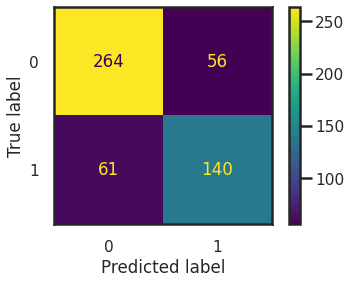

In [56]:
sns.set_style('white')
plot_confusion_matrix(lr,xtest,ytest)

In [57]:
lr.score(xtest, ytest)
a1.append(lr.score(xtest, ytest))

In [58]:
X[0]

array([ 67.  ,   0.  ,   1.  , 228.69,  36.6 ,   1.  ,   1.  ,   1.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ])

In [59]:
a=[[70,1,1,30,24,0,1,0,0,0,0,1,0,0,1,0]]

In [60]:
lr.predict(a)

array([1])

In [61]:
b=[[20,0,0,200,28,1,0,1,0,1,0,0,0,0,0,0]]

In [62]:
lr.predict(b)

array([0])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


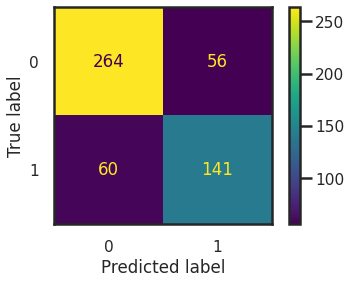

Test Accuracy: 0.7773512476007678
Time taken for SVM Regression Model: 2.830606460571289


In [63]:
from sklearn import svm
import time
start_time = time.time()
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(xtrain,ytrain)
svm_time = time.time() - start_time

Y_predTest = clf.predict(xtest)
Y_predTrain = clf.predict(xtrain)

plot_confusion_matrix(clf, xtest, ytest)
plt.show()

# misclassified = np.where(ytest != clf.predict(xtest))
# err_rate = (len(misclassified) / len(xtest))


trainAcc = accuracy_score(ytrain, Y_predTrain)
testAcc_svm = accuracy_score(ytest,Y_predTest)

print(f'Test Accuracy: {testAcc_svm}')
print(f'Time taken for SVM Regression Model: {svm_time}')

a1.append(testAcc_svm)
b1.append(svm_time)
c1.append('SVM Classification')



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


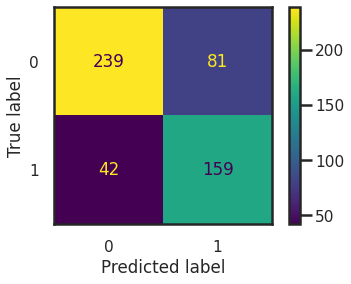

Test Accuracy: 0.763915547024952
Time taken for MLP Regression Model: 1.2750930786132812


In [64]:
from sklearn.neural_network import MLPClassifier

start_time = time.time()
mlp_clf = MLPClassifier(random_state=1, max_iter=500).fit(xtrain, ytrain)
mlp_time = time.time() - start_time

Y_predTrainMLP = mlp_clf.predict(xtrain)
Y_predTestMLP = mlp_clf.predict(xtest)

trainAccMLP = accuracy_score(ytrain, Y_predTrainMLP)
testAccMLP = accuracy_score(ytest,Y_predTestMLP)


plot_confusion_matrix(mlp_clf, xtest, ytest)
plt.show()

print(f'Test Accuracy: {testAccMLP}')
print(f'Time taken for MLP Regression Model: {mlp_time}')

a1.append(testAccMLP)
b1.append(mlp_time)
c1.append('MLP Classification')

In [65]:
main_df=df.drop('stroke',axis=1)
main_label=df.stroke

#**Preprocessing Main Dataset with 40000+ Datapoints:**

In [66]:
main_df=main_df.drop('id',axis=1)

In [67]:
main_df['bmi'].fillna(main_df['bmi'].mean(), inplace= True)

In [68]:
main_df['smoking_status'].fillna(main_df['smoking_status'].mode()[0], inplace=True)

In [69]:
marriage=pd.get_dummies(main_df['ever_married'],drop_first=True)
main_df.drop(['ever_married'],axis=1,inplace=True)
main_df['ever_married']=marriage

In [70]:
main_df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,ever_married
0,Male,3.0,0,0,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Private,Urban,87.96,39.2,never smoked,1
2,Female,8.0,0,0,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Private,Rural,69.04,35.9,formerly smoked,1
4,Male,14.0,0,0,Never_worked,Rural,161.28,19.1,never smoked,0


In [71]:
main_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
ever_married         0
dtype: int64

In [72]:
sex=pd.get_dummies(main_df['gender'],drop_first=True)
main_df.drop(['gender'],axis=1,inplace=True)
main_df['gender']=sex['Male']

In [73]:
main_df.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,ever_married,gender
0,3.0,0,0,children,Rural,95.12,18.0,never smoked,0,1
1,58.0,1,0,Private,Urban,87.96,39.2,never smoked,1,1
2,8.0,0,0,Private,Urban,110.89,17.6,never smoked,0,0
3,70.0,0,0,Private,Rural,69.04,35.9,formerly smoked,1,0
4,14.0,0,0,Never_worked,Rural,161.28,19.1,never smoked,0,1


In [74]:
marriage=pd.get_dummies(main_df['ever_married'],drop_first=True)
main_df.drop(['ever_married'],axis=1,inplace=True)
main_df['ever_married']=marriage

In [75]:
residence = pd.get_dummies(main_df["Residence_type"], drop_first= True)
main_df.drop(["Residence_type"],axis=1,inplace=True)
main_df['Residence_type']=residence

In [76]:
main_df.work_type.unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [77]:
occupation = pd.get_dummies(main_df['work_type'])
main_df.drop(["work_type"], axis = 1, inplace = True)
main_df = pd.concat([main_df, occupation], axis = 1)

In [78]:
main_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender,ever_married,Residence_type,Govt_job,Never_worked,Private,Self-employed,children
0,3.0,0,0,95.12,18.0,never smoked,1,0,0,0,0,0,0,1
1,58.0,1,0,87.96,39.2,never smoked,1,1,1,0,0,1,0,0
2,8.0,0,0,110.89,17.6,never smoked,0,0,1,0,0,1,0,0
3,70.0,0,0,69.04,35.9,formerly smoked,0,1,0,0,0,1,0,0
4,14.0,0,0,161.28,19.1,never smoked,1,0,0,0,1,0,0,0


In [79]:
smoke = pd.get_dummies(main_df['smoking_status'])
main_df.drop(["smoking_status"], axis = 1, inplace = True)
main_df = pd.concat([main_df, smoke], axis = 1)

In [80]:
xtrain_main,xtest_main, ytrain_main, ytest_main = train_test_split(main_df, main_label, test_size = 0.9, random_state=0)

In [81]:
print(len(xtest_main))
print(len(xtrain_main))
print(len(ytrain_main))
print(len(ytest_main))

39060
4340
4340
39060


In [82]:
predictions_main = lr.predict(xtest_main)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [83]:
confusion_matrix(ytest_main,predictions_main)

array([[31399,  6953],
       [  201,   507]])

#**Data Visualization:**

Confusion Matrix for Logistic Regression Model:


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


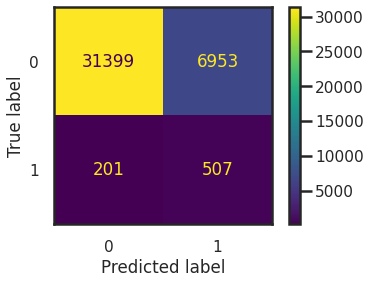

In [85]:
print('Confusion Matrix for Logistic Regression Model:')
plot_confusion_matrix(lr,xtest_main, ytest_main)

Confusion Matrix for SVM Classification Model:


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


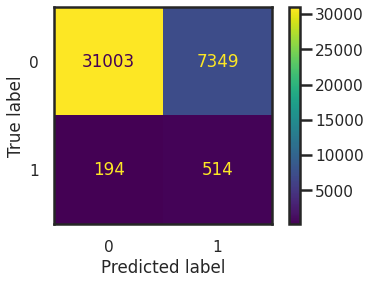

In [86]:
print('Confusion Matrix for SVM Classification Model:')
plot_confusion_matrix(clf,xtest_main, ytest_main)

Confusion Matrix for MLP Classification Model:


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


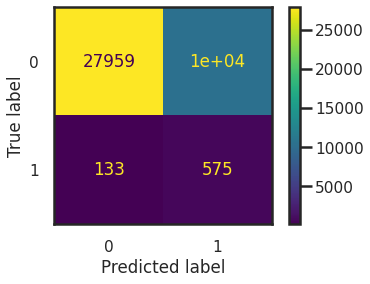

In [87]:
print('Confusion Matrix for MLP Classification Model:')
plot_confusion_matrix(mlp_clf,xtest_main, ytest_main)

In [88]:

# a1 = [testAcc_svm, testAccMLP, ]
t1 = [logreg_time, svm_time, mlp_time]
c1 = ['Logistic Regression','SVM Classification', 'MLP Classification']
a2 = [lr.score(xtest_main, ytest_main), clf.score(xtest_main, ytest_main), mlp_clf.score(xtest_main, ytest_main)]



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [89]:
print(t1,c1,a2)

[0.11763262748718262, 2.830606460571289, 1.2750930786132812] ['Logistic Regression', 'SVM Classification', 'MLP Classification'] [0.8168458781362007, 0.8068868407578085, 0.7305171530977983]


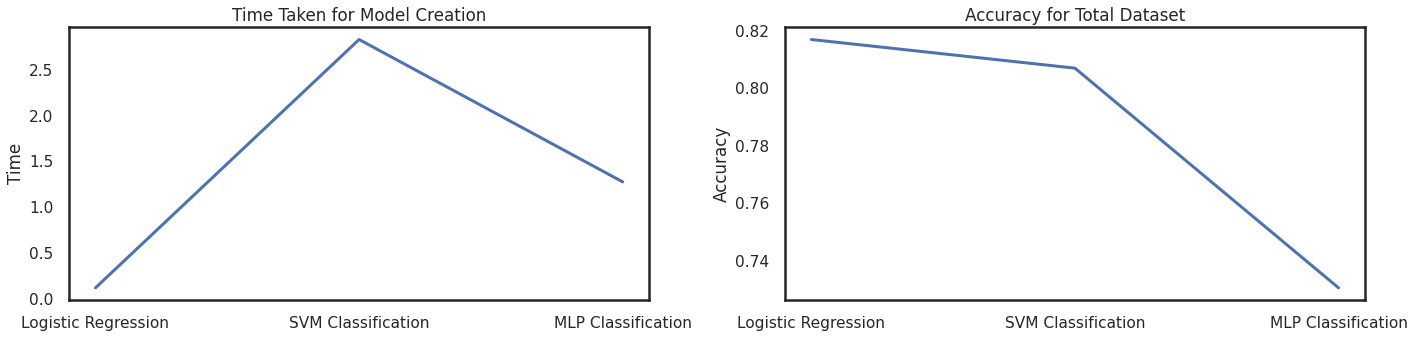

In [90]:
fig = plt.figure(figsize=(20,5))
# plt.subplot(1,3,1)
# plt.plot(c1,a1)
# plt.title('Mini Dataset')
# plt.ylabel('Accuracy')
plt.subplot(1,2,1)
plt.plot(c1,t1)
plt.title('Time Taken for Model Creation')
plt.ylabel('Time')
plt.subplot(1,2,2)
plt.plot(c1,a2)
plt.title('Accuracy for Total Dataset')
plt.ylabel('Accuracy')
fig.tight_layout()
plt.show()